In [17]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from itertools import combinations

import networkx as nx

import random

from ineqpy import inequality

import ast

import json

In [25]:
df = pd.read_csv('/Users/trevor/Desktop/Research/climate-trends/climate_articles_unique_english.csv')

/var/folders/1g/6pgh6bw14hgcbgppl7q0jgfr0000gn/T/ipykernel_19854/1539378662.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/trevor/Desktop/Research/climate-trends/climate_articles_unique_english.csv')


In [26]:
df.shape

(328015, 50)

In [5]:
df.columns

Index(['created', 'license', 'publisher', 'published-online', 'author', 'page',
       'indexed', 'special_numbering', 'assertion', 'editor', 'relation',
       'score', 'issued', 'volume', 'source', 'update-policy', 'updated-by',
       'deposited', 'archive', 'is-referenced-by-count', 'alternative-id',
       'prefix', 'DOI', 'language', 'abstract', 'resource', 'member', 'issue',
       'link', 'ISSN', 'content-domain', 'published-print', 'type',
       'short-container-title', 'journal-issue', 'references-count',
       'subtitle', 'published-other', 'original-title', 'reference-count',
       'published', 'title', 'container-title', 'reference', 'funder',
       'issn-type', 'article-number', 'URL', 'cleaned_abstract',
       'earliest_pub_year'],
      dtype='object')

In [27]:
df['author'][1]
# list of dictionaries

"[{'given': 'Paul', 'family': 'Smaglik', 'sequence': 'first', 'affiliation': []}]"

In [32]:
df_non_na_author = df[~df['author'].isna()]

In [33]:
df_non_na_author.shape

(289698, 50)

In [34]:
df_non_na_author.loc[:,'author_dict'] = df_non_na_author['author'].apply(str).apply(ast.literal_eval) 

/var/folders/1g/6pgh6bw14hgcbgppl7q0jgfr0000gn/T/ipykernel_19854/3356144983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_na_author.loc[:,'author_dict'] = df_non_na_author['author'].apply(str).apply(ast.literal_eval)


In [41]:
df_non_na_author['author_dict'][0][0].get('affiliation')

[]

In [42]:
states = [
    {"code": "US", "name": "United States"},
    {"code": "USA", "name": "United States of America"},
    {"code": "AL", "name": "Alabama"},
    {"code": "AK", "name": "Alaska"},
    {"code": "AZ", "name": "Arizona"},
    {"code": "AR", "name": "Arkansas"},
    {"code": "CA", "name": "California"},
    {"code": "CO", "name": "Colorado"},
    {"code": "CT", "name": "Connecticut"},
    {"code": "DE", "name": "Delaware"},
    {"code": "FL", "name": "Florida"},
    {"code": "GA", "name": "Georgia"},
    {"code": "HI", "name": "Hawaii"},
    {"code": "ID", "name": "Idaho"},
    {"code": "IL", "name": "Illinois"},
    {"code": "IN", "name": "Indiana"},
    {"code": "IA", "name": "Iowa"},
    {"code": "KS", "name": "Kansas"},
    {"code": "KY", "name": "Kentucky"},
    {"code": "LA", "name": "Louisiana"},
    {"code": "ME", "name": "Maine"},
    {"code": "MD", "name": "Maryland"},
    {"code": "MA", "name": "Massachusetts"},
    {"code": "MI", "name": "Michigan"},
    {"code": "MN", "name": "Minnesota"},
    {"code": "MS", "name": "Mississippi"},
    {"code": "MO", "name": "Missouri"},
    {"code": "MT", "name": "Montana"},
    {"code": "NE", "name": "Nebraska"},
    {"code": "NV", "name": "Nevada"},
    {"code": "NH", "name": "New Hampshire"},
    {"code": "NJ", "name": "New Jersey"},
    {"code": "NM", "name": "New Mexico"},
    {"code": "NY", "name": "New York"},
    {"code": "NC", "name": "North Carolina"},
    {"code": "ND", "name": "North Dakota"},
    {"code": "OH", "name": "Ohio"},
    {"code": "OK", "name": "Oklahoma"},
    {"code": "OR", "name": "Oregon"},
    {"code": "PA", "name": "Pennsylvania"},
    {"code": "RI", "name": "Rhode Island"},
    {"code": "SC", "name": "South Carolina"},
    {"code": "SD", "name": "South Dakota"},
    {"code": "TN", "name": "Tennessee"},
    {"code": "TX", "name": "Texas"},
    {"code": "UT", "name": "Utah"},
    {"code": "VT", "name": "Vermont"},
    {"code": "VA", "name": "Virginia"},
    {"code": "WA", "name": "Washington"},
    {"code": "WV", "name": "West Virginia"},
    {"code": "WI", "name": "Wisconsin"},
    {"code": "WY", "name": "Wyoming"},
    {"code": "PR", "name": "Puerto Rico"}
]

state_names = {state["name"] for state in states}
state_codes = {state["code"] for state in states}


In [43]:
countries_mapping = {
    "afghanistan": "Afghanistan",
    "albania": "Albania",
    "algeria": "Algeria",
    "andorra": "Andorra",
    "angola": "Angola",
    "antigua and barbuda": "Antigua And Barbuda",
    "argentina": "Argentina",
    "armenia": "Armenia",
    "australia": "Australia",
    "austria": "Austria",
    "azerbaijan": "Azerbaijan",
    "bahamas": "Bahamas",
    "bahrain": "Bahrain",
    "bangladesh": "Bangladesh",
    "barbados": "Barbados",
    "belarus": "Belarus",
    "belgium": "Belgium",
    "belize": "Belize",
    "benin": "Benin",
    "bhutan": "Bhutan",
    "bolivia": "Bolivia",
    "bosnia and herzegovina": "Bosnia And Herzegovina",
    "botswana": "Botswana",
    "brazil": "Brazil",
    "brunei": "Brunei",
    "bulgaria": "Bulgaria",
    "burkina faso": "Burkina Faso",
    "burundi": "Burundi",
    "cabo verde": "Cabo Verde",
    "cambodia": "Cambodia",
    "cameroon": "Cameroon",
    "canada": "Canada",
    "central african republic": "Central African Republic",
    "chad": "Chad",
    "chile": "Chile",
    "china": "China",
    "colombia": "Colombia",
    "comoros": "Comoros",
    "congo": "Congo",
    "costa rica": "Costa Rica",
    "croatia": "Croatia",
    "cuba": "Cuba",
    "cyprus": "Cyprus",
    "czech republic": "Czech Republic",
    "denmark": "Denmark",
    "djibouti": "Djibouti",
    "dominica": "Dominica",
    "dominican republic": "Dominican Republic",
    "ecuador": "Ecuador",
    "egypt": "Egypt",
    "el salvador": "El Salvador",
    "equatorial guinea": "Equatorial Guinea",
    "eritrea": "Eritrea",
    "estonia": "Estonia",
    "eswatini": "Eswatini",
    "ethiopia": "Ethiopia",
    "fiji": "Fiji",
    "finland": "Finland",
    "france": "France",
    "gabon": "Gabon",
    "gambia": "Gambia",
    "georgia": "Georgia",
    "germany": "Germany",
    "ghana": "Ghana",
    "greece": "Greece",
    "grenada": "Grenada",
    "guatemala": "Guatemala",
    "guinea": "Guinea",
    "guinea-bissau": "Guinea-Bissau",
    "guyana": "Guyana",
    "haiti": "Haiti",
    "honduras": "Honduras",
    "hungary": "Hungary",
    "iceland": "Iceland",
    "india": "India",
    "indonesia": "Indonesia",
    "iran": "Iran",
    "iraq": "Iraq",
    "ireland": "Ireland",
    "israel": "Israel",
    "italy": "Italy",
    "jamaica": "Jamaica",
    "japan": "Japan",
    "jordan": "Jordan",
    "kazakhstan": "Kazakhstan",
    "kenya": "Kenya",
    "kiribati": "Kiribati",
    "kosovo": "Kosovo",
    "kuwait": "Kuwait",
    "kyrgyzstan": "Kyrgyzstan",
    "laos": "Laos",
    "latvia": "Latvia",
    "lebanon": "Lebanon",
    "lesotho": "Lesotho",
    "liberia": "Liberia",
    "libya": "Libya",
    "liechtenstein": "Liechtenstein",
    "lithuania": "Lithuania",
    "luxembourg": "Luxembourg",
    "madagascar": "Madagascar",
    "malawi": "Malawi",
    "malaysia": "Malaysia",
    "maldives": "Maldives",
    "mali": "Mali",
    "malta": "Malta",
    "marshall islands": "Marshall Islands",
    "mauritania": "Mauritania",
    "mauritius": "Mauritius",
    "mexico": "Mexico",
    "micronesia": "Micronesia",
    "moldova": "Moldova",
    "monaco": "Monaco",
    "mongolia": "Mongolia",
    "montenegro": "Montenegro",
    "morocco": "Morocco",
    "mozambique": "Mozambique",
    "myanmar": "Myanmar",
    "namibia": "Namibia",
    "nauru": "Nauru",
    "nepal": "Nepal",
    "netherlands": "Netherlands",
    "new zealand": "New Zealand",
    "nicaragua": "Nicaragua",
    "niger": "Niger",
    "nigeria": "Nigeria",
    "north korea": "North Korea",
    "north macedonia": "North Macedonia",
    "norway": "Norway",
    "oman": "Oman",
    "pakistan": "Pakistan",
    "palau": "Palau",
    "palestine": "Palestine",
    "panama": "Panama",
    "papua new guinea": "Papua New Guinea",
    "paraguay": "Paraguay",
    "peru": "Peru",
    "philippines": "Philippines",
    "poland": "Poland",
    "portugal": "Portugal",
    "qatar": "Qatar",
    "romania": "Romania",
    "russia": "Russia",
    "rwanda": "Rwanda",
    "saint kitts and nevis": "Saint Kitts And Nevis",
    "KN N": "Saint Kitts And Nevis",
    "saint lucia": "Saint Lucia",
    "saint vincent and the grenadines": "Saint Vincent And The Grenadines",
    "samoa": "Samoa",
    "san marino": "San Marino",
    "sao tome and principe": "Sao Tome And Principe",
    "saudi arabia": "Saudi Arabia",
    "senegal": "Senegal",
    "serbia": "Serbia",
    "seychelles": "Seychelles",
    "sierra leone": "Sierra Leone",
    "singapore": "Singapore",
    "slovakia": "Slovakia",
    "slovenia": "Slovenia",
    "solomon islands": "Solomon Islands",
    "somalia": "Somalia",
    "south africa": "South Africa",
    "south korea": "South Korea",
    "south sudan": "South Sudan",
    "spain": "Spain",
    "sri lanka": "Sri Lanka",
    "sudan": "Sudan",
    "suriname": "Suriname",
    "sweden": "Sweden",
    "switzerland": "Switzerland",
    "syria": "Syria",
    "taiwan": "Taiwan",
    "tajikistan": "Tajikistan",
    "tanzania": "Tanzania",
    "thailand": "Thailand",
    "timor-leste": "Timor-Leste",
    "togo": "Togo",
    "tonga": "Tonga",
    "trinidad and tobago": "Trinidad And Tobago",
    "tunisia": "Tunisia",
    "turkey": "Turkey",
    "turkmenistan": "Turkmenistan",
    "tuvalu": "Tuvalu",
    "uganda": "Uganda",
    "ukraine": "Ukraine",
    "united arab emirates": "UAE",
    "united kingdom": "UK",
    "united states": "USA",
    "uruguay": "Uruguay",
    "uzbekistan": "Uzbekistan",
    "vanuatu": "Vanuatu",
    "vatican city": "Vatican City",
    "venezuela": "Venezuela",
    "vietnam": "Vietnam",
    "yemen": "Yemen",
    "zambia": "Zambia",
    "zimbabwe": "Zimbabwe",
}

In [44]:
global_cities = {
    "belgrade" : "Serbia",
    "berkeley" : "USA",
    "seattle" : "USA",
    "davis" : "USA",
    "nsw" : "Australia",
    "novi sad" : "Serbia",
    "paris" : "France",
    "exeter" : "UK",
    "boston" :"USA",
    "santa barbara" : "USA",
    "london" : "UK",
    "bnin" : "Poland",
    "espaa" : "Spain",
    "oxford" : "UK",
    "columbia" : "USA",
    "sydney" : "Australia",
    "seoul" : "Korea",
    "hiroshima" : "Japan",
    "shinshu" : "Japan",
    "yokohama"  :"Japan",
    "beijing" : "China",
    "new delhi" :"India",
    "nihon" : "Japan",
    "madison" : "USA",
    "lao pdr" :"Laos",
    "sngl" :"Sengal",
    "ahmedabad" : "India",
    "beograd" : "Serbia",
    # BREAK 
    "algrie": "Algeria",
    "university cambridge": "UK",
    "los angeles": "US",
    "libya": "Libya",
    "tottori university": "Japan",
    "ivory coast": "Cote d'Ivoire",
    "san francisco": "US",
    "afghanistan": "Afghanistan",
    "west indies": "West Indies",
    "kobe university": "Japan",
    "boulder": "USA",
    "gambia": "Gambia",
    "bern": "Switzerland",
    "kanazawa": "Japan",
    "tajikistan": "tajikistan",
    "chiba": "Japan",
    "faroe islands": "Faroe Islands",
    "dominica": "Dominican Republic",
    "paraguay": "Paraguay",
    "cabon": "Gabon",
    "CN": "China",
    "london": "UK",
    "berlin": "Germany",
    "copenhagen": "Denmark",
    "rikkyo": "Japan",
    "iwate": "Japan",
    "andorra": "Andorra",
    "tonga": "Tonga",
    "hokkaido Univ": "Japan",
    "nicaragua": "Nicaragua",
    "qld": "Australia",
    "ontario": "Canada",
    "el salvador": "El Salvador",
    "chad": "Chad",
    "uppsala": "Sweden",
    "seikei": "Japan",
    "temple": "USA",
    "ann arbor": "USA",
    "cornell": "USA",
    "columbia": "USA",
    "queensland": "Australia",
    "ni": "UK",
    "chinese academy": "China",
    "new caledonia": "New Caledonia",
    "monaco": "Monaco",
    "honduras": "Honduras",
    "keio": "Japan",
    "nagasaki": "Japan",
    "CH": "Switzerland",
    "philadelphia": "USA",
    "kangwon": "Korea",
    "miyazaki": "Japan",
    "italia": "Italy",
    "melbourne": "Australia",
    "las vegas": "USA",
    "adelaide": "Australia",
    "queensland": "Australia",
    "guadeloupe": "France",
    "islamabad": "Pakistan",
    "ibaraki": "Japan",
    "ain shams": "Egypt",
    "kolkata": "India",
    "british columbia": "Canada",
    "micronesia": "Micronesia",
    "taipei": "Taiwan",
    "tamil nadu": "India",
    "osaka university": "Japan",
    "suriname": "Suriname",
    "bahamas": "Bahamas",
    "it": "Italy",
    "gk a": "guernsey",
    "burundi": "burundi",
    "slovenija": "slovenia",
    "nber": "USA",
    "witwatersrand": "south africa",
    "san diego": "USA",
    "college park": "USA",
    "toronto": "Canada",
    "udaipur": "India",
    "dortmund": "Germany",
    "santa cruz": "USA",
    "shizuoka": "Japan",
    "Division": "Unknown",
    "wageningen": "Netherlands",
    "princeton": "United States",
    "york university": "Canada",
    "akita": "Japan",
    "istanbul": "Türkiye", 
    "victoria": "Australia", 
    "nz": "New Zealand",
    "guyana": "Guyana",
    "kanagawa": "Japan",
    "tokyo": "Japan",
    "reno": "USA",
    "ng w": "Nigeria",
    "ehime university": "Japan",
    "rutgers": "USA",
    "jp": "Japan", 
    "victoria university wellington": "New Zealand",
    "university punjab": "Pakistan",
    "harvard": "USA",
    "exeter": "UK",
    "fort collins": "USA",
    "laramie": "USA",
    "university park": "USA",
    "panam": "Panama",
    "cl": "Chile",
    "manchester": "UK",
    "london": "UK",
    "san marino": "San Marino",
    "oxford": "UK",
    "chennai": "India",
    "pune": "India",
    "barcelona": "Spain",
    "muroran": "Japan",
    "teikyo": "Japan",
    "yamagata": "Japan",
    "hosei": "Japan",
    "fukuoka": "Japan",
    "minneapolis": "United States",
    "tunisie": "Tunisia",
    "grenada": "Grenada",
    "rome": "Italy",
    "ras": "Russia",
    "yamanashi": "Japan",
    "maharashtra": "India",
    "cape verde": "Cape Verde",
    "stockholm": "Sweden",
    "fr": "France",
    "osaka": "Japan",
    "dc" : "USA",
    "mxico" : "Mexico",
    "trkiye" : "Turkiye",
    "us": "USA",
    "viet nam" : "Vietnam",
    "sngal" : 'Senegal',
    "burundi" : 'Burundi',
    "türkiye" : 'Turkiye',
    "guernsey" : "Guernsey",
    "united states": "USA",
    "kushiro": "Japan",
    "uttarakhand": "India",
    "riverside" : 'USA',
    'trondheim' : 'norway',
    'ottawa' : 'Canada',
    'tsukuba': 'Japan',
    'zrch' : 'Switzerland',
    'nederlandsche' : 'Netherlands',
    'wooster': 'USA',
    'charlottesvile': 'USA',
    'atlanta': 'USA',
    'lucknow': 'India',
    'corvallis': 'USA',
    'r s a': 'Russia',
    'u k': "UK",
    'U K': 'UK',
    'u s a': 'USA',
    'U S A': 'USA',
    'taichung': 'Taiwan',
    'roma' : 'Italy',
    'mass': 'USA',
    'rajasthan': 'India',
    'chapel hill': 'USA',
    'san luis obispo': 'USA',
    'kure': 'Japan',
    'amherst': 'USA',
    'brisbane': 'Australia',
    'west bengal': 'India',
    'lahore': 'Pakistan',
    'telaviv': 'Israel',
    'storrs' : 'USA',
    'veracruz': 'Mexico',
    'karnataka': 'India',
    'greensboro' : 'USA',
    'fullerton': 'USA',
    'roorkee': 'India',
    'legon': 'Ghana',
    'brookings' : 'USA',
    'omaha' : 'USA',
    'vancouver': 'Canada',
    'manhattan' : 'USA',
    'peking' : 'China',
    'st augustine': 'USA',
    'amsterdam' : 'Netherlands',
    'irvine' : 'USA',
    'finnland': 'Finland',
    'vaud' : 'Switzerland',
    'kollam': 'India',
    'himacha': 'India',
    'knoxville' : 'USA',
    'new orleans' : 'USA',
    'ammerbuch' : 'Germany',
    'graz' : 'Austria',
    'ljubljana' : 'Slovenia',
    'chevella': 'India',
    'hohhot': 'China',
    'marocco': 'Morocco',
    'nsukka': 'Nigeria',
    'mehsanna' : 'India',
    'barrackpore': 'India',
    'kampala': 'Uganda', 
    'guwahati': 'India',
    'harare' : 'Zimbabwe',
    'oakland': 'USA',
    'alnarp': 'Sweden',
    'petrovaradin':'Serbia',
    'imphal': 'India',
    'vientiane' : 'Laos',
    'saskatchewan' : 'Canada',
    'trkiye': 'Turkiye',
    'changhua' : 'Taiwan',
    'tabasco' : 'Mexico',
    'helsinki': 'Finland',
    'srilanka' : 'Sri Lanka',
    'tulsa' : 'Tulsa',
    'dublin' : 'Ireland',
    'pretoria' : 'South Africa',
    'nottingham' : 'UK',
    'neuherberg': 'Germany',
    'lincoln': 'USA',
    'bloomington': 'USA',
    'east lansing': 'USA',
    'greenland': 'Greenland',
    'buffalo': 'USA',
    'birmingham' : 'USA',
    'dehradun': 'India',
    'xinjiang': 'China',
    'nassau' : 'Bahamas',
    'accra': 'Ghana',
    'ajmer': 'India',
    # BREAK
    "curacao": "Curaçao",
    "democratic republic": "Democratic Republic of the Congo",
    "ranchi": "India",
    "hayward": "USA",
    "liechtenstein": "Liechtenstein",
    "east sussex": "UK",
    "leicester": "UK",
    "lr a": "Liberia",
    "ly h": "Libya",
    "dearborn": "USA",
    "argonne": "USA",
    "gujarat": "India",
    "chico": "USA",
    "docklands": "Australia",
    "dharwad": "India",
    "amsterdam": "Netherlands",
    "jabalpur": "India",
    "baylor": "USA",
    "macao": "Macau",
    "columbus": "USA",
    "accra": "Ghana",
    "vi": "USA",
    "charlotte": "USA",
    "isfahan": "Iran",
    "changchun": "China",
    "glasgow": "UK",
    "hubballi": "India",
    "dnk": "Denmark",
    "williams": "United States",
    "NT": "Unknown",
    "dublin": "Ireland",
    "bangalore": "India",
    "indonseia": "Indonesia",
    "ibadan": "Nigeria",
    "veracruz": "Mexico",
    "vienna": "Austria",
    "cruoaotia": "Croatia",
    "bhubaneswar": "India",
    "nottingham": "United Kingdom",
    "zurich": "Switzerland",
    "chiayi county": "Taiwan",
    "kyoto": "Japan",
    "hungar": "Hungary",
    "avikanagar": "India",
    "arusha": "Tanzania",
    "nagpur": "India",
    "sukkur": "Pakistan",
    "guimares": "Portugal",
    "enugu": "Nigeria",
    "machakos": "Kenya",
    "ntu": "Singapore",
    "delhi": "India",
    "bengaluru": "India",
    "polnad": "Poland",
    "nasa": "USA",
    "bc": "Canada",
    "yukon": "Canada",
    "keffi": "Nigeria",
    "kwara state": "Nigeria",
    "gadag": "India",
    "gandhinagar": "India",
    "jiangsu": "China",
    "trgumure": "Romania",
    "atlanta ": "USA",
    "york u": "Canada",
    "mcdonough school business": "USA",
    "tampa": "USA",
    "stanbul": "Turkiye",
    "nazarbayev u": "kazakhstan",
    "lyon": "france",
    "commonwealth edison": "USA",
    "bhilai": "India",
    "concordia u": "Canada",
    "tyne wear": "UK",
    "cameroun": "Cameroon",
    "jamnagar": "India",
    "orkney": "UK",
    "kampala": "Uganda",
    "ucsf": "USA",
    "budapest": "Hungary",
    "yale": "USA",
    "kelantan": "Malaysia",
    "tempe": "USA",
    "sverige": "Sweden",
    "kerala": "India",
    "pau business school": "France",
    "orlando": "USA",
    "holyhoke": "USA",
    "eth zrich ch": "Switzerland",
    "phillippines": "Philippines",
    "assam": "India",
    "central saint martins": "UK",
    "honolulu": "USA",
    "asante mampong": "Ghana",
    "bulaksumur": "Indonesia",
    "michoacn mxico": "Mexico",
    "galway": "Ireland",
    "comoros": "Comoros",
    "german aerospace center": "Germany",
    "palau": "Palau",
    "lgeria": "Algeria",
    "belize": "Belize",
    "gainesville": "USA",
    "cambridge university": "UK",
    "university cambridge": "UK",
    "cambridge": "USA",
    "edinburgh": "united kingdom",
    "sterreich": "Austria",
    "shanghai": "China",
    "timorleste": "Timor-Leste",
    "TimorLest" : 'Timor-Leste',
    "mayotte": "France",
    "amherst": "United States",
    "gelnhausen": "Germany",
    "newark": "USA",
    "eth zurich": "Switzerland",
    "nasagov": "USA",
    "eschsuralzette groussherzogtum ltzebuerg": "Luxembourg",
    "kochi": "India",
    "visakhapatnam": "India",
    "maroc": "Morocco",
    "canterbury": "UK",
    "dresden": "Germany",
    "sendai": "Japan",
    "calif": "USA",
    "austin": "USA",
    "tehran": "Iran",
    "crowthorne": "UK",
    "krusevac": "Serbia",
    "hahinohe": "Japan",
    "govau": "Australia",
    "belguim": "Belgium",
    "sioux falls": "USA",
    "hannover": "Germany",
    "bremen": "Germany",
    "nuremberg": "Germany",
    "kyrgyztan": "Kyrgyzstan",
    "tw": "Taiwan",
    "morelos": "Mexico",
    "gustavus adolphus college": "USA",
    "gb": "UK",
    "lyon": "France",
    "medelln": "Colombia",
    "plymouth": "UK",
    "cape town": "South Africa",
    "wallops island": "USA",
    "kfar saba": "Israel",
    "new haven": "USA",
    "brownedu": "USA",
    "wakayama": "Japan",
    "nova scotia": "Canada",
    "brussels": "Belgium",
    "okanagan": "Canada",
    "urbanachampaign": "USA",
    "kragujevac": "Serbia",
    "chattanooga": "USA",
    "south arica": "South Africa",
    "jerusalem": "Israel",
    "lausanne": "Switzerland",
    "hyderabad": "India",
    "el paso": "USA",
    "montpellier": "France",
    "portuga": "Portugal",
    "raleigh": "USA",
    "recife pernambuco": "Brazil",
    "prague": "Czech Republic",
    "moscow": "Russia",
    "waterloo": "Canada",
    "oslo": "Norway",
    "boltzmannstrae garching": "Germany",
    "napoli": "Italy",
    "salerno": "Italy",
    "pomona": "USA",
    "ostrava": "Czech Republic",
    " ir": "Iran",
    "schweiz": "Switzerland",
    "fgv": "Brazil",
    "warsaw": "Poland",
    "florence": "Italy",
    "geneva": "Switzerland",
    "sichuan": "China",
    "rotterdam": "Netherlands",
    " on": "Canada",
    "U S A": "USA",
    "karachi": "Pakistan",
    "potsdam": "Germany",
    "sinopec": "China",
    "sp bra": "Brazil",
    "durban": "South Africa",
    "kent": "United Kingdom",
    "cardiff": "United Kingdom",
    "calcutta": "India",
    "vellore": "India",
    "ku leuven": "Belgium",
    "berry college": "United States",
    "kagoshima prefecture": "Japan",
    "tianjin": "China",
    "deutschland": "Germany",
    "iasi": "Romania",
    "czechia republic": "Czech Republic",
    "demark": "Denmark",
    "republic abkhazia": "Abkhazia",
    "hanoi": "Vietnam",
    "almaty": "Kazakhstan",
    "mxico df": "Mexico",
    "pembroke street cambridge": "UK",
    "tuvalu": "Tuvalu",
    " bh": "Bahrain",
    "jakarta": "Indonesia",
    "tongji u": "China",
    "ciudad de mxico": "Mexico",
    "canads": "Canada",
    "college station": "USA",
    "uae": "UAE",
    "lagos": "Nigeria",
    "pusa": "India",
    "san marcos": "USA",
    "algarve": "Portugal",
    "sacramento": "USA",
    "macau": "Macau",
    "corvallis": "USA",
    "bijbehara": "India",
    "east bay": "USA",
    "goa": "India",
    "kiribati": "Kiribati",
    "saltsjboo": "Sweden",
    "aurora": "USA",
    "pullman": "USA",
    "tas": "Australia",
    "santiago": "Chile",
    " au": "Australia",
    " gr": "Greece",
    "lecco": "Italy",
    "alberta": "Canada",
    " pl": "Poland",
    " dhaka": "Bangladesh",
    "guine": "Guinea",
    "banghladesh": "Bangladesh",
    "northridge": "United States",
    " sg": "Singapore",
    " rs": "Serbia",
    " kong": "Hong Kong",
    "madrid": "Spain",
    "brooklyn": "United States",
    "puebla Mxico": "Mexico",
    "belgique": "Belgium",
    " tr": "Turkey",
    "moscow": "Russia",
    "uttar pradesh": "India",
    " vic": "Australia",
    " nl": "Netherlands",
    "united states" : "USA",
    "tajikistan": "Tajikistan",
    "united kingdom" : "UK",
    "eth zrich" : "Switzerland",
    "norway": "Norway",
    "ggawarkiewiczwhoiedu" : "USA",
    "NL G" : "Netherlands",
    'Cross River State': 'Nigeria',
    'Solomont School Nursing': 'USA',
    'email seunghwanbaekpnnlgov': 'USA',
    'kazakhstan': 'Kazakhstan',
    'Mount Holyoke College' : 'USA',
    'Minna': 'Nigeria',
    'HA B': 'Haiti',
    'CF XD' : 'Central African Republic',
    'GP W' : 'France',
    'Tulsa' : 'USA',
    'Curaçao': 'Netherlands',
    "SN K": 'Senegal',
    "Mehsana" : 'India',
    "HV S" : 'Burkina Faso',
    "GH R" : 'Ghana',
    "SS A": 'South Sudan',
    "GL A" : 'Greenland',
    "GK P" : 'UK',
    "EL A" : 'Greece',
    'Mich' : 'USA',
    'Dhaka' : 'Bangladesh',
    'W V': 'USA',
    'MH T' : 'Marshall Islands',
    'NL C' : 'Netherlands',
    'BH R': 'Bahrain',
    "LS K" : "Lesotho"
}

In [45]:
country_codes = {
    # official country codes
    "AF": "Afghanistan",
    "AX": "Åland Islands",
    "AL": "Albania",
    "DZ": "Algeria",
    "AS": "USA",
    "AD": "Andorra",
    "AO": "Angola",
    "AI": "Anguilla",
    "AQ": "Antarctica",
    "AG": "Antigua and Barbuda",
    "AR": "Argentina",
    "AM": "Armenia",
    "AW": "Aruba",
    "AU": "Australia",
    "AT": "Austria",
    "AZ": "Azerbaijan",
    "BS": "Bahamas",
    "BH": "Bahrain",
    "BD": "Bangladesh",
    "BB": "Barbados",
    "BY": "Belarus",
    "BE": "Belgium",
    "BZ": "Belize",
    "BJ": "Benin",
    "BM": "Bermuda",
    "BT": "Bhutan",
    "BO": "Bolivia",
    "BQ": "Bonaire, Sint Eustatius and Saba",
    "BA": "Bosnia and Herzegovina",
    "BW": "Botswana",
    "BV": "Bouvet Island",
    "BR": "Brazil",
    "IO": "UK",
    "BN": "Brunei Darussalam",
    "BG": "Bulgaria",
    "BF": "Burkina Faso",
    "BI": "Burundi",
    "CV": "Cape Verde",
    "KH": "Cambodia",
    "CM": "Cameroon",
    "CA": "Canada",
    "KY": "UK",
    "CF": "Central African Republic",
    "TD": "Chad",
    "CL": "Chile",
    "CN": "China",
    "CX": "Christmas Island",
    "CC": "Australia",
    "CO": "Colombia",
    "KM": "Comoros",
    "CD": "Congo", # DRC
    "CG": "Congo",
    "CK": "Cook Islands",
    "CR": "Costa Rica",
    "CI": "Cote d'Ivoire",
    "HR": "Croatia",
    "CU": "Cuba",
    "CW": "Curaçao",
    "CY": "Cyprus",
    "CZ": "Czechia",
    "DK": "Denmark",
    "DJ": "Djibouti",
    "DM": "Dominica",
    "DO": "Dominican Republic",
    "EC": "Ecuador",
    "EG": "Egypt",
    "SV": "El Salvador",
    "GQ": "Equatorial Guinea",
    "ER": "Eritrea",
    "EE": "Estonia",
    "SZ": "Eswatini",
    "ET": "Ethiopia",
    "FK": "Falkland Islands",
    "FO": "Faroe Islands",
    "FJ": "Fiji",
    "FI": "Finland",
    "FR": "France",
    "GF": "French Guiana",
    "PF": "French Polynesia",
    "TF": "France",
    "GA": "Gabon",
    "GM": "Gambia",
    "GE": "Georgia",
    "DE": "Germany",
    "GH": "Ghana",
    "GI": "Gibraltar",
    "GR": "Greece",
    "GL": "Greenland",
    "GD": "Grenada",
    "GP": "Guadeloupe",
    "GU": "Guam",
    "GT": "Guatemala",
    "GG": "Guernsey",
    "GN": "Guinea",
    "GW": "Guinea-Bissau",
    "GY": "Guyana",
    "HT": "Haiti",
    "HM": "Heard Island and McDonald Islands",
    "VA": "Vatican City",
    "HN": "Honduras",
    "HK": "Hong Kong",
    "HU": "Hungary",
    "IS": "Iceland",
    "IN": "India",
    "ID": "Indonesia",
    "IR": "Iran",
    "IQ": "Iraq",
    "IE": "Ireland",
    "IM": "Isle of Man",
    "IL": "Israel",
    "IT": "Italy",
    "JM": "Jamaica",
    "JP": "Japan",
    "JE": "Jersey",
    "JO": "Jordan",
    "KZ": "Kazakhstan",
    "KE": "Kenya",
    "KI": "Kiribati",
    "KP": "North Korea",
    "KR": "Korea",
    "KW": "Kuwait",
    "KG": "Kyrgyzstan",
    "LA": "Laos",
    "LV": "Latvia",
    "LB": "Lebanon",
    "LS": "Lesotho",
    "LR": "Liberia",
    "LY": "Libya",
    "LI": "Liechtenstein",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "LG": 'Latvia',
    "MO": "Macao",
    "MG": "Madagascar",
    "MW": "Malawi",
    "MY": "Malaysia",
    "MV": "Maldives",
    "ML": "Mali",
    "MT": "Malta",
    "MH": "Marshall Islands",
    "MQ": "Martinique",
    "MR": "Mauritania",
    "MU": "Mauritius",
    "YT": "Mayotte",
    "MX": "Mexico",
    "FM": "Micronesia",
    "MD": "Moldova",
    "MC": "Monaco",
    "MN": "Mongolia",
    "ME": "Montenegro",
    "MS": "Montserrat",
    "MA": "Morocco",
    "MZ": "Mozambique",
    "MM": "Myanmar",
    "NA": "Namibia",
    "NR": "Nauru",
    "NP": "Nepal",
    "NL": "Netherlands",
    "NC": "New Caledonia",
    "NZ": "New Zealand",
    "NI": "Nicaragua",
    "NE": "Niger",
    "NG": "Nigeria",
    "NU": "Niue",
    "NF": "Norfolk Island",
    "MK": "North Macedonia",
    "MP": "USA",
    "NO": "Norway",
    "OM": "Oman",
    "PK": "Pakistan",
    "PW": "Palau",
    "PS": "Palestine",
    "PA": "Panama",
    "PG": "Papua New Guinea",
    "PY": "Paraguay",
    "PE": "Peru",
    "PH": "Philippines",
    "PN": "UK",
    "PL": "Poland",
    "PT": "Portugal",
    "PR": "Puerto Rico",
    "QA": "Qatar",
    "RE": "Réunion",
    "RO": "Romania",
    "RU": "Russia",
    "RW": "Rwanda",
    "BL": "Saint Barthélemy",
    "SH": "UK",
    "KN": "Saint Kitts and Nevis",
    "LC": "Saint Lucia",
    "MF": "France",
    "PM": "Saint Pierre and Miquelon",
    "VC": "Saint Vincent and the Grenadines",
    "WS": "USA",
    "SM": "San Marino",
    "ST": "Sao Tome and Principe",
    "SA": "Saudi Arabia",
    "SN": "Senegal",
    "RS": "Serbia",
    "SC": "Seychelles",
    "SL": "Sierra Leone",
    "SG": "Singapore",
    "SX": "Netherlands",
    "SK": "Slovakia",
    "SI": "Slovenia",
    "SB": "Solomon Islands",
    "SO": "Somalia",
    "ZA": "South Africa",
    "GS": "South Georgia and the South Sandwich Islands",
    "SS": "South Sudan",
    "ES": "Spain",
    "LK": "Sri Lanka",
    "SD": "Sudan",
    "SR": "Suriname",
    "SJ": "Norway",
    "SE": "Sweden",
    "CH": "Switzerland",
    "SY": "Syrian Arab Republic",
    "TW": "Taiwan",
    "TJ": "Tajikistan",
    "TZ": "Tanzania",
    "TH": "Thailand",
    "TL": "Timor-Leste",
    "TG": "Togo",
    "TK": "Tokelau",
    "TO": "Tonga",
    "TT": "Trinidad and Tobago",
    "TN": "Tunisia",
    "TR": "Turkiye",
    "TM": "Turkmenistan",
    "TC": "UK",
    "TV": "Tuvalu",
    "UG": "Uganda",
    "UA": "Ukraine",
    "AE": "UAE",
    "GB": "UK",
    "UM": "USA",
    "US": "USA",
    "UY": "Uruguay",
    "UZ": "Uzbekistan",
    "VU": "Vanuatu",
    "VE": "Venezuela",
    "VN": "Vietnam",
    "VG": "UK",
    "VI": "USA",
    "WF": "Wallis and Futuna",
    "EH": "Western Sahara",
    "YE": "Yemen",
    "ZM": "Zambia",
    "ZW": "Zimbabwe",
    # common abbreviations
    "ROC": "Taiwan",
    "United States" : "USA",
    "RSA" : "South Africa",
    "R S A" : "South Africa",
    "UK": "UK",
    "USA": "USA",
    'DG' : 'UK'
}


In [46]:
def parse_code(country_name):
    potential_country_code = country_codes.get(country_name)
    if potential_country_code:
        return potential_country_code
    # maybe try splitting by white space
    else:
        return country_name

def standardize_name(country):
    # standardize representations of country names based on sub-national location information
    if any(state in country for state in state_names.union(state_codes)):
        country = "USA"
    if ("China" in country) and ("Journal" not in country):
        country = "China" 
    if (
        ("England" in country) or ("Scotland" in country) or ("Wales" in country) or 
        ("Northern Ireland" in country) or ("UK" in country) or ("United Kingdom" in country)
    ) and ("Journal" not in country):
        country = "UK"
    if ("Korea" in country) and ("north" not in country.lower()):
        country = "Korea"
    if "Viet" in country.lower():
        country = "Vietnam"
    if "United Arab Emirates" in country:
        country = "UAE"
    if ("university" in country.lower()) and ("belgrade" in country.lower()):
        country = "Serbia"
    if (
        ("university" in country.lower()) or ("center" in country.lower()) or 
        ("institute" in country.lower()) or ("agency" in country.lower())
    ) and (
        "tokyo" in country.lower() or "kyoto" in country.lower() or 
        "hokkaido" in country.lower() or "kyushu" in country.lower() or 
        "japan" in country.lower() or "tsukuba" in country.lower() or 
        "tohoku" in country.lower() or "nagoya" in country.lower() or 
        "gifu" in country.lower()
    ):
        country = "Japan"
    if ("france" in country.lower()) and ("journal" not in country.lower()):
        country = "France"
    if ("arabia" in country.lower()) and ("journal" not in country.lower()):
        country = "Saudi Arabia"
    if "ivoire" in country.lower():
        country = "Cote d'Ivoire"
    # Adjust for consistency in accents, contemporary nomenclature
    if ("México" in country) and ("journal" not in country.lower()):
        country = "Mexico"
    if (("Turkey" in country) or ("Trkiye" in country)) and ("journal" not in country.lower()):
        country = "Turkiye"
    return country




In [47]:
countries = ['USA',
'China',
'UK', 
'Germany',
'Italy',
'Canada',
'France',
'Spain'
'India',
'Japan',
'Netherlands',
'Korea',
'Sweden',
'Norway',
'Brazil',
'Poland',
'Portugal',
'Denmark,'
'Iran',
'Belgium',
'Greece',
'Finland',
'Malaysia',
'Saudi Arabia',
'Taiwan',
'Pakistan',
'New Zealand',
'Mexico',
'Turkey',
'Ethiopia',
'Czech Republic',
'Thailand',
'Chile',
'Oman',
'Ireland',
'Indonesia',
'Israel',
'Bangladesh',
'Ghana',
'Kenya',
'Egypt',
'Hungary',
'Singapore',
'UAE',
'Colombia',
'Serbia',
'Argentina',
'Nepal',
'Slovakia',
'Morocco',
'Croatia',
'Algeria',
'Philippines',
'Peru',
'Mali',
'Jordan',
'Ecuador',
'Iraq',
'Kazakhstan',
'Uganda',
'Ukraine',
'Sri Lanka',
'Zimbabwe',
'Cameroon',
'Qatar',
'Hong Kong',
'Iceland',
'Bulgaria',
'Senegal',
'Burkina Faso',
'Sierra Leone',
"Cote d'Ivoire",
'Fiji',
'Botswana',
'Costa Rica',
'Uruguay',
'Turkiye',
'Lebanon',
'Mongolia',
'Panama',
'Rwanda',
'Cambodia',
'Malawi',
'Luxembourg',
'Togo',
'Zambia',
'Uzbekistan',
'Congo',
'Mozambique',
'Malta',
'Jamaica',
'Namibia',
'Montenegro',
'Palestine',
'Bahrain',
'Barbados',
'Slovak Republic',
'Venezuela',
'Greenland',
'Guinea',
'Cuba',
'Brunei',
'Switzerland',
'Sudan',
'Myanmar',
'Kyrgyzstan',
'Madagascar',
'Samoa',
'West Indies',
'Bhutan',
'Solomon Islands',
'Nigeria',
'Laos',
'Czechia',
'South Africa',
'Libya',
'Azerbaijan',
'Moldova',
'Guatemala',
'Vanuatu',
'Kosovo',
'Seychelles',
'Syria',
'Australia',
'Andorra',
'Gambia',
'Tonga',
'Tajikistan',
'Gabon',
'Paraguay',
'Faroe Islands',
'Chad',
'El Salvador',
'Suriname',
'Monaco',
'Cape Verde',
'Micronesia',
'Guernsey',
'Bahamas',
'Liberia',
'Burundi',
'San Marino',
'Guyana',
'Grenada',
'Cayman Islands',
'Norway',
'Yemen',
'Maldives',
'Russia',
'Marshall Islands',
'Macau',
'Austria',
'Bermuda',
'Djibouti',
'Romania',
'Angola',
'Cook Islands',
'Liechtenstein',
'Palau',
'Belize',
'Comoros',
'Falkland Islands',
'Slovenia',
'Abkhazia',
"Timor-Leste",
'Vietnam',
'Tuvalu']

In [48]:
def get_affiliations(list_dicts):
    # Given a list of dictionaries, 
    # return a list of the UNIQUE countries of collaboration
    # Note: using primary affiliation for reference
    out_list = []
    if list_dicts:
        for dictionary in list_dicts:
            affiliation = dictionary.get('affiliation')
            if affiliation and isinstance(affiliation, list) and len(affiliation) > 0:
                affiliation_string = affiliation[0].get('name', '')
                match = re.search(r',\s*([^,]+)$', affiliation_string)
                if match:
                    country = match.group(1).strip()
                    # delete filler words and extra spaces
                    country = re.sub(r'\bcorresponding author\b|\bauthor\b|\bthe\b|\bThe\b|\band\b|\bAnd\b|\bof\b|\bOf\b', '', country)
                    # remove chars except A-Z
                    country = re.sub(r"[^a-zA-Z\s]", "", country)
                    # replace two white spaces with one   
                    country = re.sub(r"\s{2,}", " ", country).strip()
                    country = standardize_name(country)
                    # see if country in name
                    for key in countries_mapping.keys():
                        if key in country.lower():
                            country = countries_mapping.get(key)
                    for city in global_cities.keys():
                        if city in country.lower():
                            country = global_cities.get(city)
                    # check for complex country names, otherwise just keep last word
                    if country.count(" ") > 2:
                        country_string = re.search(r'\S*$', country)
                        country = country_string.group(0).strip()
                    country = parse_code(country)
                    # then add to list 
                    if (country not in out_list) and (country in countries):
                        position = dictionary.get('sequence', '')
                        if position == 'first':
                            out_list.insert(0, country) 
                        else:
                            out_list.append(country) 
    return out_list


In [49]:
re.search(r'\S*$', "the big city in the, netherlands").group(0)

'netherlands'

In [54]:
df_non_na_author['author_dict'][1]

"[{'given': 'Paul', 'family': 'Smaglik', 'sequence': 'first', 'affiliation': []}]"

In [55]:
get_affiliations(df_non_na_author['author_dict'][1])

[]

In [56]:
df_non_na_author['affiliations'] = df_non_na_author['author_dict'].apply(lambda x: get_affiliations(x))

/var/folders/1g/6pgh6bw14hgcbgppl7q0jgfr0000gn/T/ipykernel_19854/1675576472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_na_author['affiliations'] = df_non_na_author['author_dict'].apply(lambda x: get_affiliations(x))


In [57]:
df_non_na_author['num_affiliation'] = df_non_na_author['affiliations'].apply(lambda x: len(x))

/var/folders/1g/6pgh6bw14hgcbgppl7q0jgfr0000gn/T/ipykernel_19854/387839948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_na_author['num_affiliation'] = df_non_na_author['affiliations'].apply(lambda x: len(x))


In [58]:
n_afil = df_non_na_author.value_counts('num_affiliation')

In [59]:
exploded_df = df_non_na_author.explode('affiliations')

In [60]:
affiliation_counts = exploded_df['affiliations'].value_counts()

In [61]:
for value, count in affiliation_counts.items():
    print(value, count)

USA 26216
China 9043
UK 8327
Germany 4292
Canada 3911
Italy 3803
France 3441
Japan 2306
Netherlands 1655
Korea 1559
Sweden 1498
Norway 1296
Brazil 965
Poland 835
Portugal 790
Belgium 674
Finland 617
Greece 607
Taiwan 578
New Zealand 557
Malaysia 522
Turkiye 501
Saudi Arabia 499
Mexico 495
Pakistan 467
Ethiopia 421
Czech Republic 388
Thailand 376
Chile 369
Ireland 345
Israel 333
Oman 321
Kenya 296
Indonesia 294
Bangladesh 292
Ghana 285
Egypt 259
Hungary 245
Argentina 243
Singapore 236
Serbia 231
Colombia 207
UAE 204
Nepal 135
Slovakia 132
Morocco 130
Croatia 126
Philippines 118
Algeria 114
Peru 99
Ukraine 92
Mali 91
Ecuador 88
Jordan 86
Iraq 85
Uganda 83
Kazakhstan 83
Iceland 78
Zimbabwe 73
Hong Kong 72
Sri Lanka 72
Cameroon 70
Qatar 67
Senegal 63
Bulgaria 58
Burkina Faso 56
Sierra Leone 49
Cote d'Ivoire 48
Costa Rica 46
Uruguay 44
Fiji 43
Botswana 42
Panama 37
Lebanon 36
Mongolia 35
Rwanda 29
Cambodia 29
Malawi 28
Luxembourg 28
Togo 25
Mozambique 25
Zambia 24
Uzbekistan 24
Congo 24
Mal

In [62]:
len(affiliation_counts)
# 162 unique countries

162

In [63]:
collaboration_counter = Counter()

for country_list in df_non_na_author['affiliations']:
    unique_countries = set(country_list)
    for c1, c2 in combinations(sorted(unique_countries), 2):
        collaboration_counter[(c1, c2)] += 1

G = nx.Graph()

for (c1, c2), weight in collaboration_counter.items():
    G.add_edge(c1, c2, weight=weight)

In [64]:
collaboration_counter

Counter({('UK', 'USA'): 1812,
         ('China', 'USA'): 1661,
         ('Canada', 'USA'): 997,
         ('Germany', 'USA'): 943,
         ('France', 'USA'): 935,
         ('Italy', 'USA'): 860,
         ('France', 'UK'): 681,
         ('Germany', 'UK'): 613,
         ('Italy', 'UK'): 577,
         ('Japan', 'USA'): 437,
         ('Germany', 'Italy'): 418,
         ('Netherlands', 'USA'): 406,
         ('Korea', 'USA'): 396,
         ('France', 'Italy'): 393,
         ('Sweden', 'USA'): 336,
         ('Canada', 'UK'): 323,
         ('France', 'Germany'): 321,
         ('Norway', 'USA'): 314,
         ('China', 'UK'): 311,
         ('Netherlands', 'UK'): 295,
         ('Canada', 'China'): 257,
         ('Brazil', 'USA'): 253,
         ('Sweden', 'UK'): 250,
         ('Germany', 'Netherlands'): 242,
         ('Japan', 'UK'): 229,
         ('Norway', 'UK'): 216,
         ('New Zealand', 'USA'): 207,
         ('China', 'Germany'): 206,
         ('Canada', 'France'): 182,
         ('Italy',

In [65]:
len(collaboration_counter)

2611

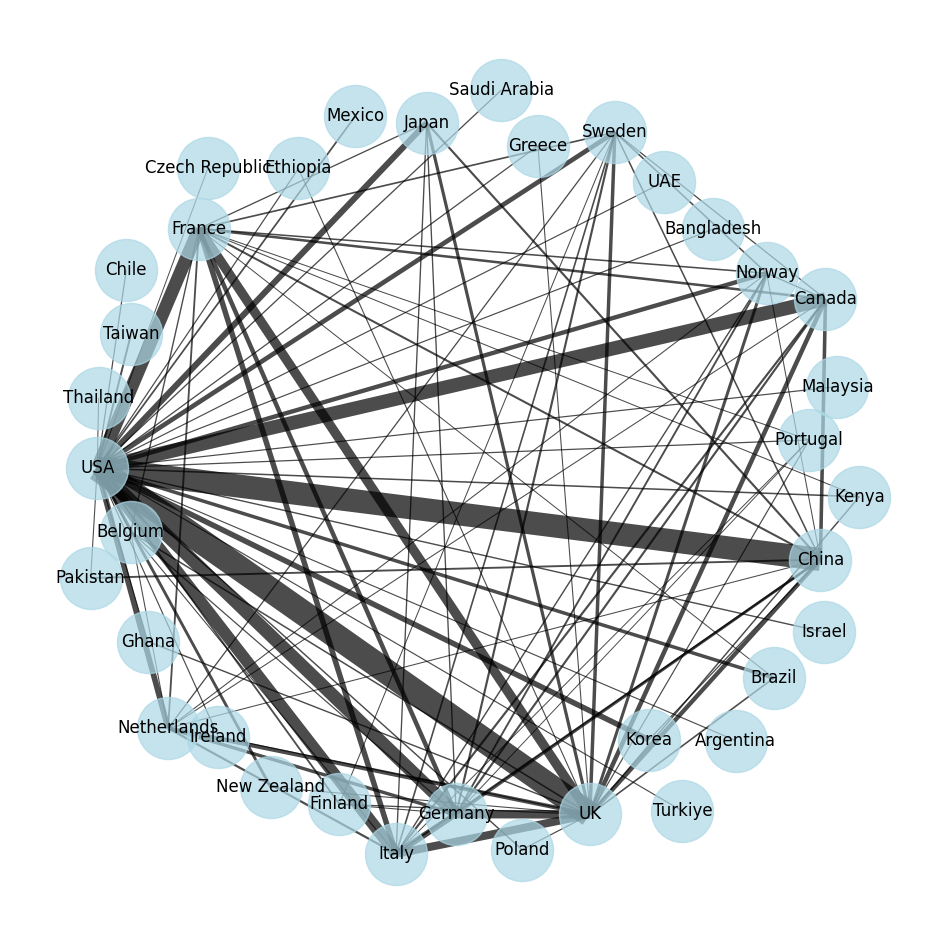

In [66]:
# the top x collaborations
top_collabs = sorted(collaboration_counter.items(), key=lambda x: x[1], reverse=True)[:100]

G_top = nx.Graph()
for (c1, c2), weight in top_collabs:
    G_top.add_edge(c1, c2, weight=weight)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G_top, k=1000, scale=200, iterations=50, seed=123) 
nx.draw_networkx_nodes(G_top, pos, node_size=2000, node_color='lightblue', alpha = 0.7)
nx.draw_networkx_edges(G_top, pos, width=[d['weight']*0.01 for (u,v,d) in G_top.edges(data=True)], alpha=0.7)
nx.draw_networkx_labels(G_top, pos, font_size=12, font_color='black')
plt.axis('off')
plt.show()


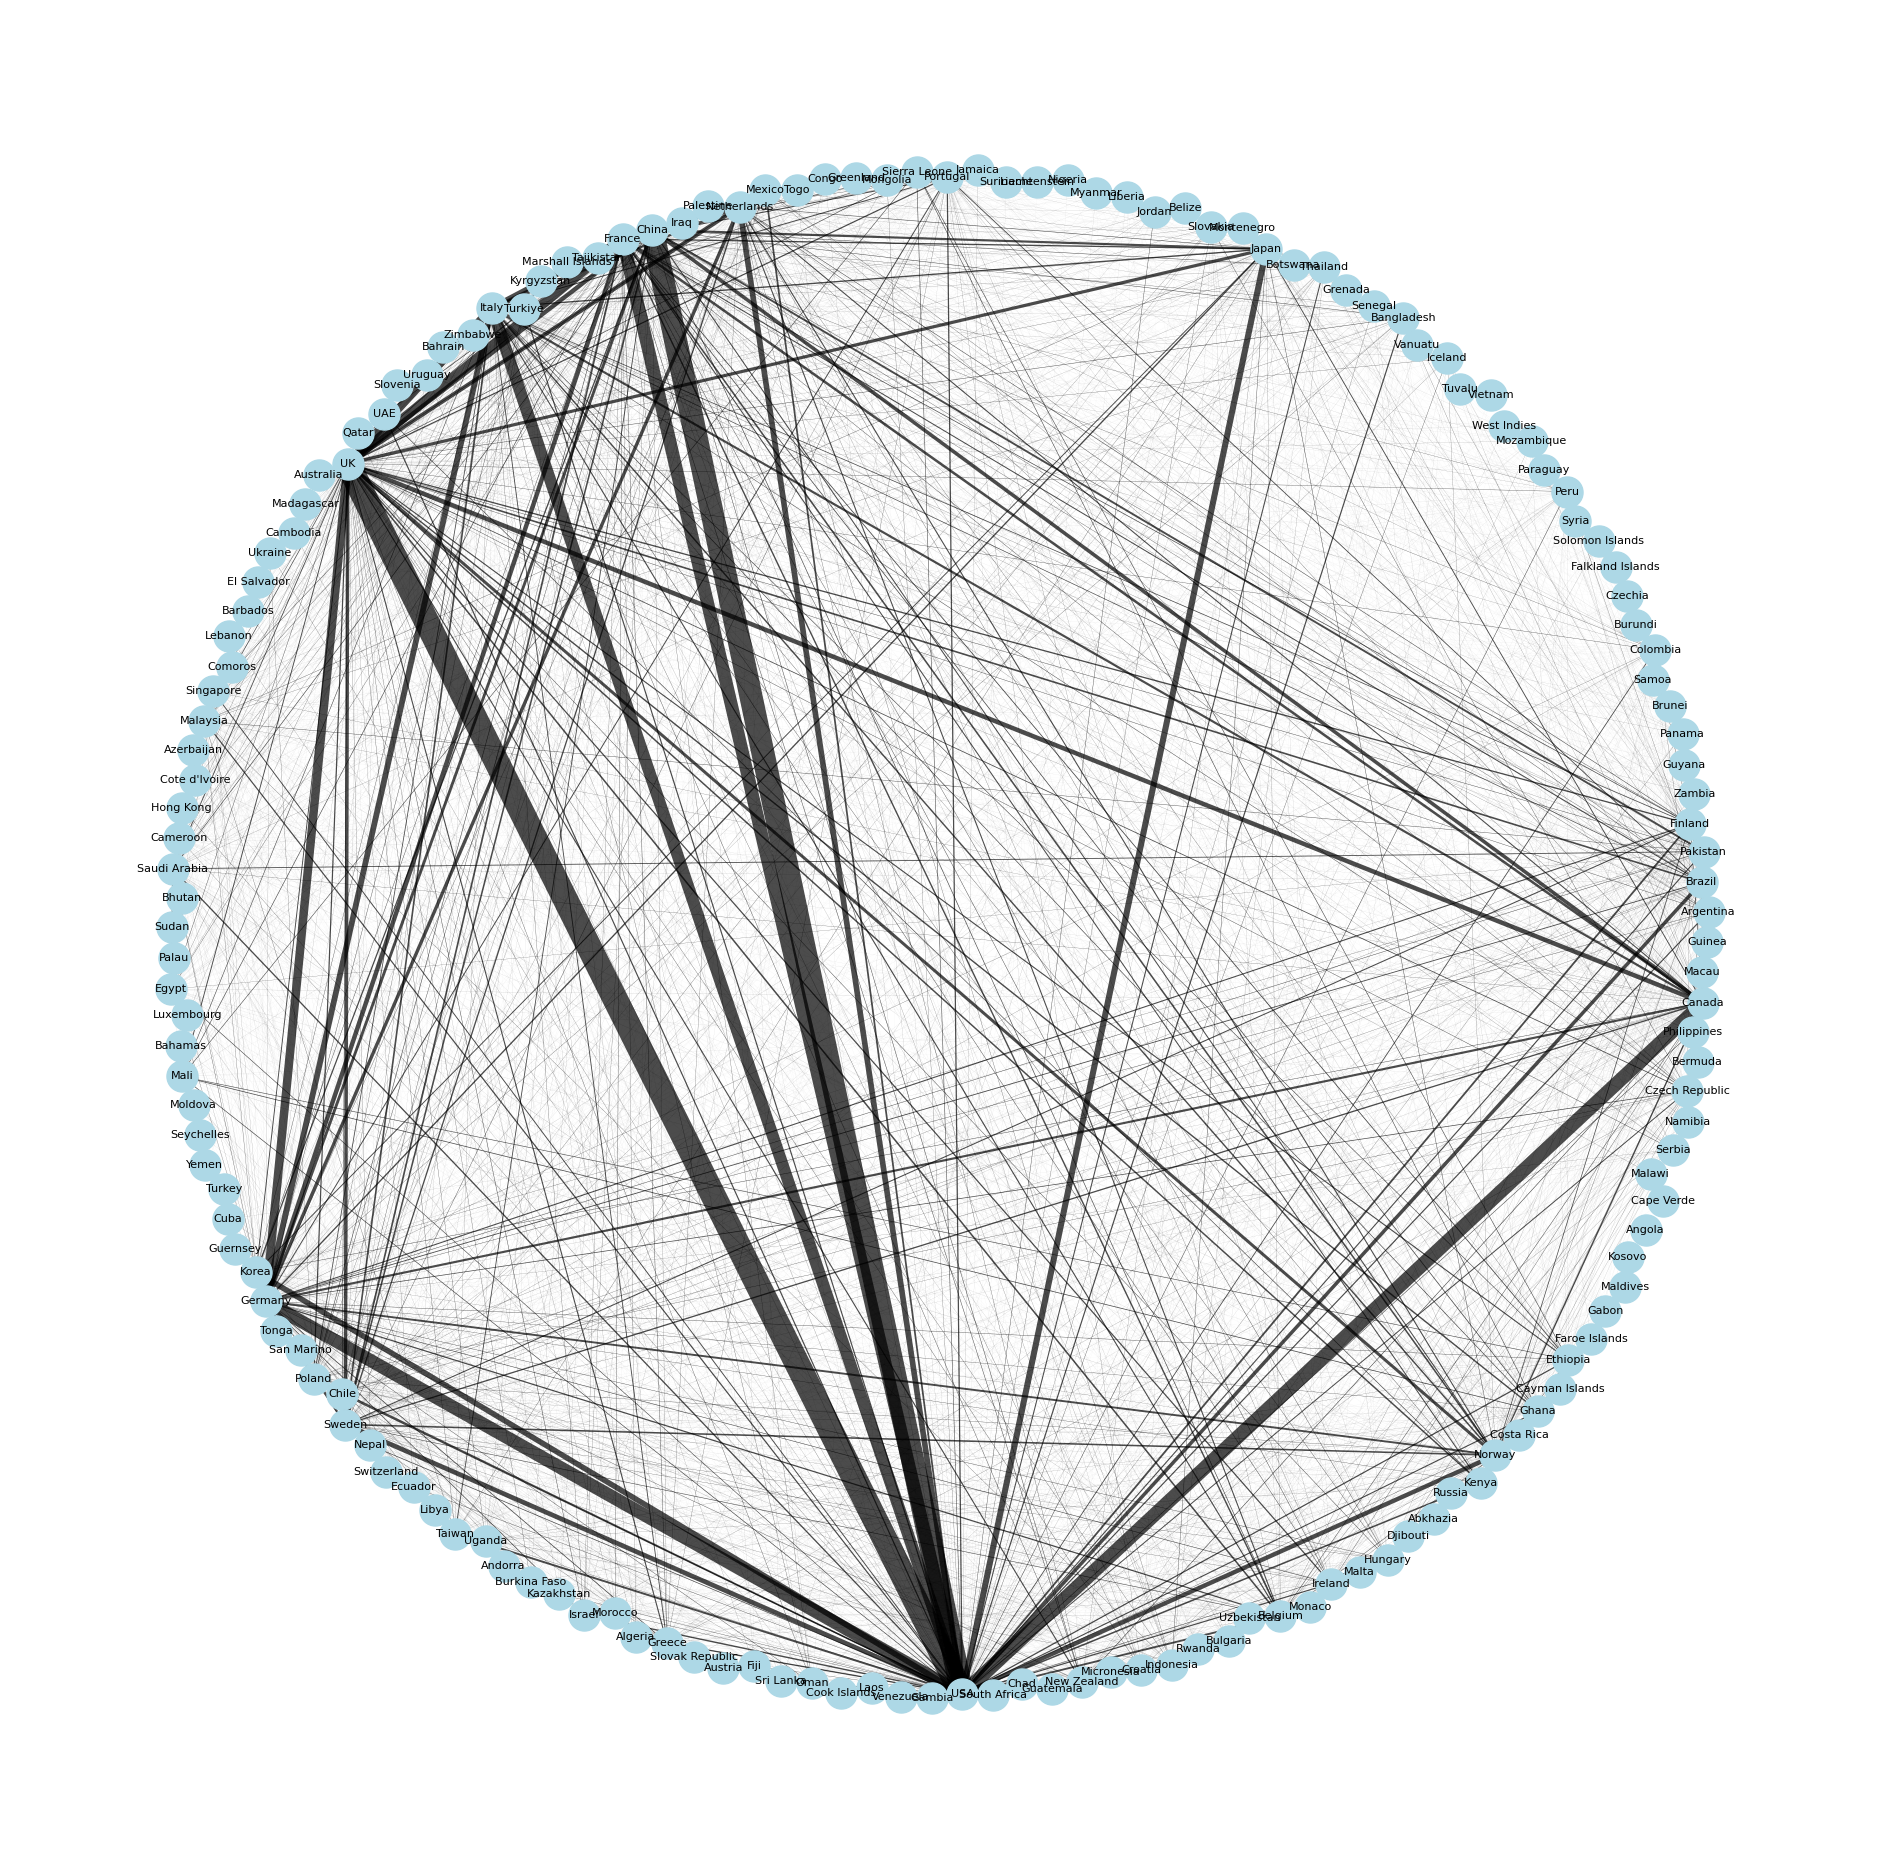

In [67]:
plt.figure(figsize=(24,24))
pos = nx.spring_layout(G, k=10000, iterations=500) 
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight']*0.01 for (u,v,d) in edges], alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
plt.axis('off')
plt.show()


Text(0, 0.5, 'Count')

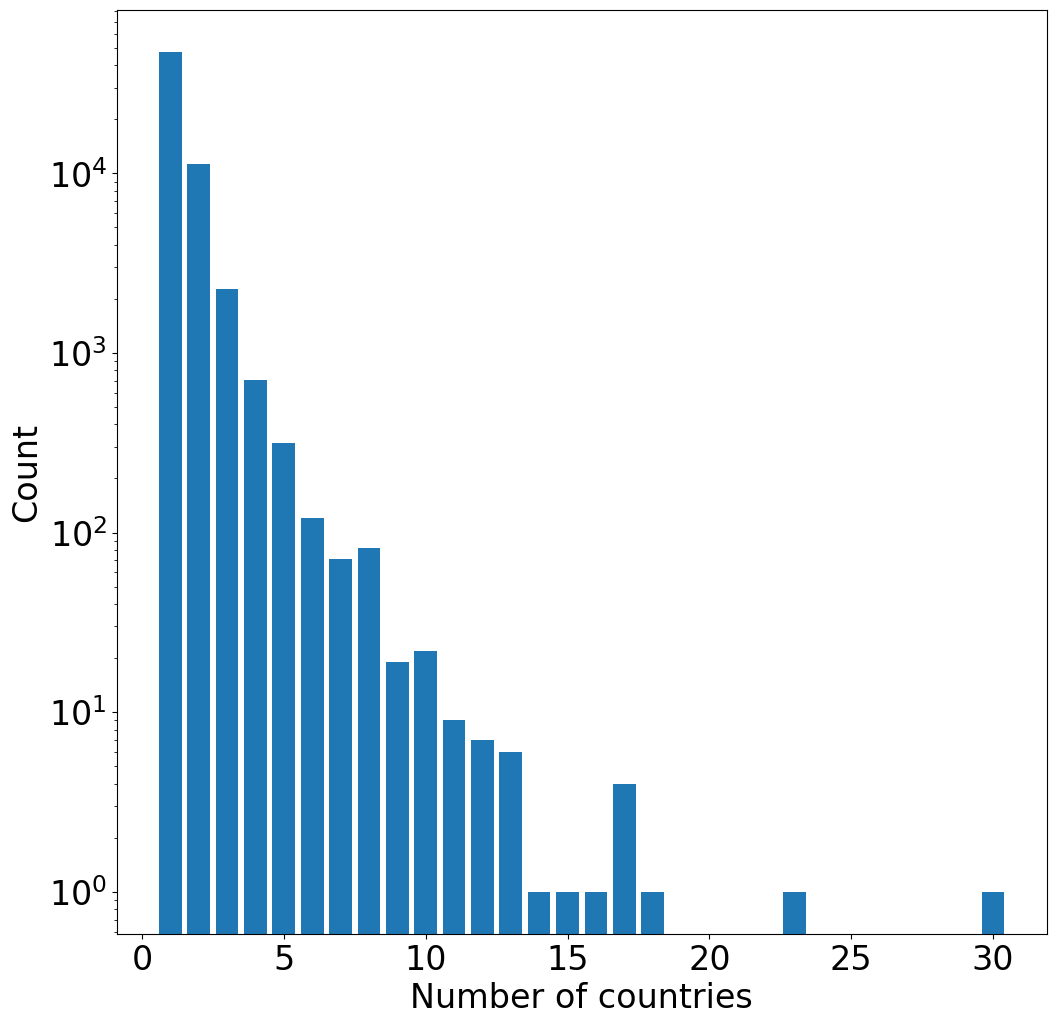

In [68]:
plt.figure(figsize=(12,12))
plt.bar(n_afil.index[1:], n_afil.values[1:])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.yscale('log')
plt.xlabel('Number of countries', fontsize = 24)
plt.ylabel('Count', fontsize = 24)

In [69]:
# Degree centrality 
# Count of edges per node
degree_centrality = nx.degree_centrality(G)
most_connected = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
most_connected

[('USA', 0.89937106918239),
 ('UK', 0.8301886792452831),
 ('Italy', 0.729559748427673),
 ('Germany', 0.7106918238993711),
 ('France', 0.7044025157232705),
 ('China', 0.6163522012578617),
 ('Netherlands', 0.5911949685534591),
 ('Belgium', 0.5786163522012578),
 ('Canada', 0.5786163522012578),
 ('Brazil', 0.5345911949685535),
 ('Japan', 0.5283018867924528),
 ('Norway', 0.5283018867924528),
 ('Portugal', 0.5094339622641509),
 ('Malaysia', 0.4968553459119497),
 ('Sweden', 0.49056603773584906),
 ('New Zealand', 0.4779874213836478),
 ('Ethiopia', 0.4339622641509434),
 ('Pakistan', 0.4339622641509434),
 ('Korea', 0.42138364779874216),
 ('Kenya', 0.42138364779874216),
 ('Ghana', 0.42138364779874216),
 ('Czech Republic', 0.39622641509433965),
 ('Poland', 0.39622641509433965),
 ('Indonesia', 0.39622641509433965),
 ('Turkiye', 0.39622641509433965),
 ('Finland', 0.389937106918239),
 ('Colombia', 0.389937106918239),
 ('Chile', 0.3836477987421384),
 ('Singapore', 0.37106918238993714),
 ('Peru', 0.371

In [70]:
# Weight (collaboration count)
strength = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}
most_weighted = sorted(strength.items(), key=lambda x: x[1], reverse=True)
most_weighted

[('USA', 12915),
 ('UK', 7737),
 ('Germany', 4562),
 ('France', 4550),
 ('Italy', 4236),
 ('China', 4136),
 ('Canada', 3053),
 ('Netherlands', 2180),
 ('Sweden', 1909),
 ('Japan', 1676),
 ('Norway', 1672),
 ('Brazil', 1083),
 ('Belgium', 1058),
 ('Korea', 1011),
 ('Finland', 845),
 ('Portugal', 807),
 ('Poland', 738),
 ('New Zealand', 675),
 ('Kenya', 636),
 ('Ethiopia', 621),
 ('Ghana', 611),
 ('Saudi Arabia', 602),
 ('Pakistan', 602),
 ('Czech Republic', 559),
 ('Greece', 547),
 ('Malaysia', 513),
 ('Ireland', 492),
 ('Turkiye', 454),
 ('Mexico', 441),
 ('Chile', 431),
 ('Taiwan', 411),
 ('Mali', 400),
 ('UAE', 380),
 ('Bangladesh', 362),
 ('Hungary', 360),
 ('Argentina', 355),
 ('Indonesia', 345),
 ('Thailand', 340),
 ('Egypt', 337),
 ('Israel', 330),
 ('Sierra Leone', 311),
 ('Colombia', 310),
 ('Singapore', 280),
 ('Oman', 257),
 ('Peru', 250),
 ('Croatia', 217),
 ('Serbia', 206),
 ('Nepal', 198),
 ('Uganda', 192),
 ('Slovakia', 181),
 ('Ecuador', 162),
 ('Iceland', 153),
 ('Camer

In [71]:
# Betweenness centrality
# How often a node lies on the shortest path between all nodes in a network

betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
most_influential = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
most_influential

[('USA', 0.06369481985871514),
 ('France', 0.062074694168470466),
 ('Japan', 0.04697211162778308),
 ('New Zealand', 0.04442876982928921),
 ('UK', 0.04253377621901769),
 ('China', 0.039597235622812595),
 ('Germany', 0.0376244075383001),
 ('Italy', 0.03612922945997309),
 ('Brazil', 0.03328182863069155),
 ('Norway', 0.030752113713582465),
 ('Netherlands', 0.030135586198252375),
 ('Belgium', 0.028521129795873856),
 ('Sweden', 0.024310833733085433),
 ('Korea', 0.022939669290592987),
 ('Portugal', 0.020909529526008008),
 ('Czechia', 0.01791495592804503),
 ('Suriname', 0.017884117552372347),
 ('Fiji', 0.016733702673575296),
 ('Malaysia', 0.016713145560333532),
 ('Singapore', 0.016651062498267567),
 ('Ghana', 0.015243603497617851),
 ('Liberia', 0.015017184617657284),
 ('Pakistan', 0.014644322445292342),
 ('Monaco', 0.014602891974176396),
 ('Ethiopia', 0.01368074115461815),
 ('Mali', 0.013660307158911885),
 ('Colombia', 0.013397797726550887),
 ('Indonesia', 0.012872639625809628),
 ('Bangladesh'

In [72]:
# Closeness centrality
# How close a node is to all other nodes in a graph

closeness_centrality = nx.closeness_centrality(G)
most_accessible = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
most_accessible


[('USA', 0.9085714285714286),
 ('UK', 0.8548387096774194),
 ('Italy', 0.7871287128712872),
 ('Germany', 0.775609756097561),
 ('France', 0.7718446601941747),
 ('China', 0.7227272727272728),
 ('Netherlands', 0.7098214285714286),
 ('Belgium', 0.7035398230088495),
 ('Canada', 0.7035398230088495),
 ('Brazil', 0.6824034334763949),
 ('Japan', 0.6794871794871795),
 ('Norway', 0.6794871794871795),
 ('Portugal', 0.6708860759493671),
 ('Malaysia', 0.6652719665271967),
 ('Sweden', 0.6625),
 ('New Zealand', 0.6570247933884298),
 ('Ethiopia', 0.6385542168674698),
 ('Pakistan', 0.6385542168674698),
 ('Korea', 0.6334661354581673),
 ('Kenya', 0.6334661354581673),
 ('Ghana', 0.6334661354581673),
 ('Czech Republic', 0.6235294117647059),
 ('Poland', 0.6235294117647059),
 ('Indonesia', 0.6235294117647059),
 ('Turkiye', 0.6235294117647059),
 ('Finland', 0.62109375),
 ('Colombia', 0.62109375),
 ('Chile', 0.6186770428015564),
 ('Singapore', 0.6138996138996139),
 ('Peru', 0.6138996138996139),
 ('Saudi Arabia',

In [73]:
# Eigenvector centrality
# Measure of influence based on influence of neighbors

eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight')
most_influential_eigen = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True) 
most_influential_eigen

[('USA', 0.5867416459027539),
 ('UK', 0.43670765230319747),
 ('China', 0.31274048127085297),
 ('Germany', 0.2788826805453485),
 ('France', 0.27612895677870963),
 ('Italy', 0.2604805431488476),
 ('Canada', 0.22618006116350928),
 ('Netherlands', 0.13476208815724794),
 ('Japan', 0.118077281815244),
 ('Sweden', 0.11613772003201732),
 ('Norway', 0.10405193259400786),
 ('Korea', 0.07720507178193173),
 ('Brazil', 0.0648291949012349),
 ('Belgium', 0.05650249718411957),
 ('New Zealand', 0.04838989150934426),
 ('Finland', 0.04794317008279983),
 ('Portugal', 0.04007256222125863),
 ('Poland', 0.038726395781360876),
 ('Kenya', 0.03604744587271317),
 ('Greece', 0.032955163184494124),
 ('Ghana', 0.03087758595828737),
 ('Ireland', 0.030772388635587487),
 ('Ethiopia', 0.030615966776068742),
 ('Pakistan', 0.029269280403110335),
 ('Taiwan', 0.02887200985247057),
 ('Mexico', 0.02850569082220878),
 ('Saudi Arabia', 0.027350945072169182),
 ('Czech Republic', 0.026254218213176635),
 ('Israel', 0.024599647909

In [74]:
# Community detection
cliques = list(nx.find_cliques(G))
print(cliques)

# clustering coefficient
# Likelihood that neighbors are connected
clustering = nx.clustering(G)
most_clustered = sorted(clustering.items(), key=lambda x: x[1], reverse=True) 
most_clustered

[['Slovenia', 'Austria', 'Germany', 'Japan'], ['Macau', 'China'], ['Tajikistan', 'Germany', 'Norway'], ['Tajikistan', 'Germany', 'Kyrgyzstan'], ['Kosovo', 'Norway'], ['Montenegro', 'Portugal', 'Greece', 'Germany', 'Hungary', 'France', 'UK', 'Italy', 'Bulgaria', 'Serbia', 'Sweden', 'Belgium', 'Turkiye', 'Croatia'], ['Burundi', 'Germany', 'France', 'Norway', 'Rwanda'], ['Burundi', 'Germany', 'France', 'Norway', 'Italy', 'Korea'], ['Grenada', 'Germany', 'UK', 'Italy', 'Serbia', 'China', 'Canada', 'Tonga', 'Fiji'], ['Yemen', 'China'], ['San Marino', 'Brazil', 'Italy'], ['Gambia', 'France', 'UK', 'Burkina Faso', 'Kenya', 'Ghana', 'Brazil'], ['Gambia', 'France', 'UK', 'Burkina Faso', 'Kenya', 'Ghana', 'Mali'], ['Gambia', 'France', 'UK', 'Burkina Faso', 'Kenya', 'Ghana', "Cote d'Ivoire"], ['Djibouti', 'France'], ['Chad', 'UK', 'Kenya', "Cote d'Ivoire", 'Togo'], ['Chad', 'UK', 'Kenya', "Cote d'Ivoire", 'Italy'], ['Chad', 'UK', 'Kenya', 'Cameroon', 'Togo'], ['Chad', 'UK', 'Kenya', 'Cameroon', '

[('Paraguay', 1.0),
 ('South Africa', 1.0),
 ('Australia', 1.0),
 ('Monaco', 1.0),
 ('Belize', 1.0),
 ('Cape Verde', 1.0),
 ('Vietnam', 1.0),
 ('Montenegro', 1.0),
 ('Vanuatu', 1.0),
 ('Nigeria', 1.0),
 ('Seychelles', 1.0),
 ('Slovak Republic', 1.0),
 ('Bermuda', 1.0),
 ('San Marino', 1.0),
 ('Bhutan', 1.0),
 ('Grenada', 1.0),
 ('Tuvalu', 1.0),
 ('Moldova', 1.0),
 ('Suriname', 1.0),
 ('Turkey', 1.0),
 ('Falkland Islands', 1.0),
 ('Slovenia', 1.0),
 ('Maldives', 1.0),
 ('Palau', 1.0),
 ('Andorra', 0.9869281045751634),
 ('El Salvador', 0.9782608695652174),
 ('Faroe Islands', 0.9722222222222222),
 ('Guatemala', 0.9566666666666667),
 ('Luxembourg', 0.9545454545454546),
 ('Ukraine', 0.9533333333333334),
 ('Sudan', 0.9373219373219374),
 ('Switzerland', 0.934640522875817),
 ('Greenland', 0.9340659340659341),
 ('Azerbaijan', 0.9311594202898551),
 ('Czechia', 0.927536231884058),
 ('Hong Kong', 0.9239130434782609),
 ('Syria', 0.9230769230769231),
 ('Madagascar', 0.9230769230769231),
 ('Guyana', 

In [75]:
# gini coefficient
gini = inequality.gini(affiliation_counts.values)
gini

# Highly unequal
# 0.8976

0.8976263983393935

In [76]:
df.columns

Index(['created', 'license', 'publisher', 'published-online', 'author', 'page',
       'indexed', 'special_numbering', 'assertion', 'editor', 'relation',
       'score', 'issued', 'volume', 'source', 'update-policy', 'updated-by',
       'deposited', 'archive', 'is-referenced-by-count', 'alternative-id',
       'prefix', 'DOI', 'language', 'abstract', 'resource', 'member', 'issue',
       'link', 'ISSN', 'content-domain', 'published-print', 'type',
       'short-container-title', 'journal-issue', 'references-count',
       'subtitle', 'published-other', 'original-title', 'reference-count',
       'published', 'title', 'container-title', 'reference', 'funder',
       'issn-type', 'article-number', 'URL', 'cleaned_abstract',
       'earliest_pub_year'],
      dtype='object')

In [77]:
df['DOI']

0                                        10.1038/35023137
1                                        10.1038/35015767
2             10.1306/c9ebd003-1735-11d7-8645000102c1865d
3                           10.1016/s0140-6701(00)93328-9
4         10.1175/1520-0442(2000)013<0202:iosgwu>2.0.co;2
                               ...                       
328010                         10.1186/s12940-022-00956-7
328011                             10.1098/rspb.2022.2181
328012                       10.1016/j.lanepe.2023.100701
328013                 10.24272/j.issn.2095-8137.2022.404
328014                                 10.1503/cjs.014223
Name: DOI, Length: 328015, dtype: object

In [78]:
df_small = df_non_na_author[['DOI', 'author', 'affiliations', 'num_affiliation']]

In [79]:
df_small.to_csv('/Users/trevor/Desktop/Research/climate-trends/climate_articles_unique_english_affiliations.csv')